Label
BENIGN                        2359289
DoS Hulk                       231073
PortScan                       158930
DDoS                            41835
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack - Brute Force         1507
Web Attack - XSS                  652
Infiltration                       36
Web Attack - Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


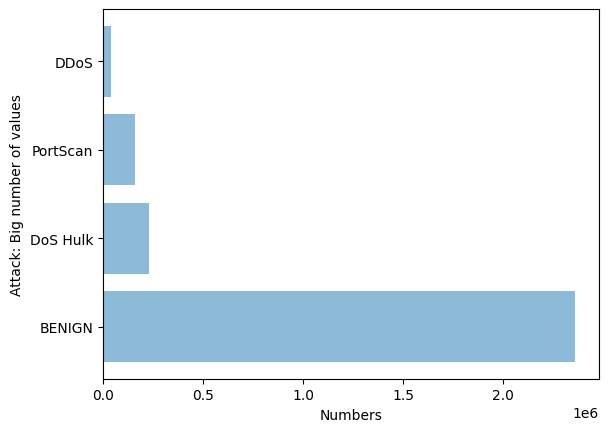

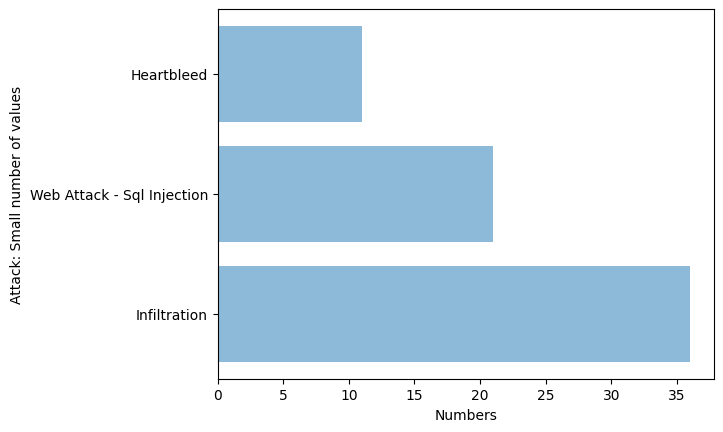

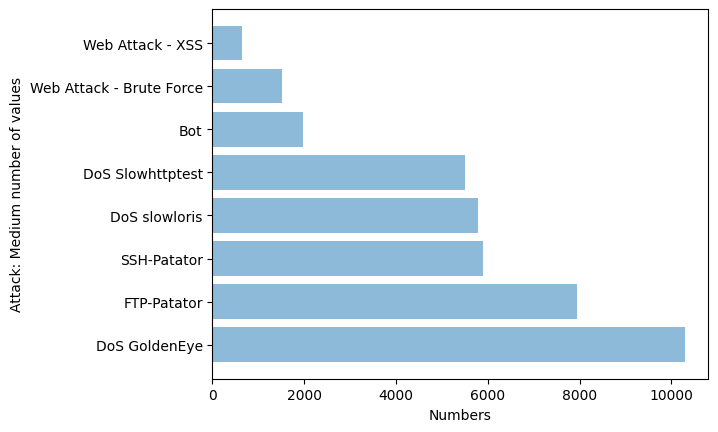

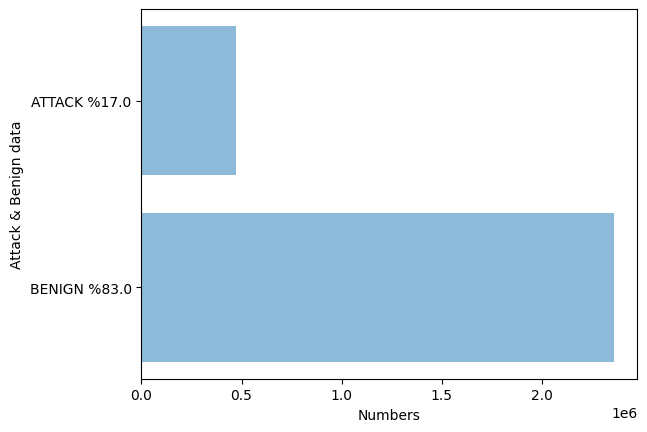

Time taken:  9.55206847190857


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
start_time=time.time()

#graph creation
def data_graph(obj,obj_value,x,y):
    y_pos=np.arange(len(obj))
    plt.barh(y_pos, obj_value, align='center', alpha=0.5)
    plt.yticks(y_pos, obj)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

df=pd.read_csv("merged.csv",usecols=["Label"])
print(df.iloc[:,-1].value_counts())
a=df.iloc[:,-1].value_counts()

key=a.keys()
value=a.values
small_labels=[]
small_values=[]
medium_labels=[]
medium_values=[]
large_labels=[]
large_values=[]
attack_lb=0
benign=0

#Dividing the data based on no of values
for i in range(0,len(value)):
    if value[i]>11000:
        large_labels.append(str(key[i]))
        large_values.append(value[i])
    elif value[i]<600:
        small_labels.append(str(key[i]))
        small_values.append(value[i])
    else:
        medium_labels.append(str(key[i]))
        medium_values.append(value[i])

    if str(key[i])=="BENIGN":
        benign+=value[i]
    else:
        attack_lb+=value[i]

key=[benign,attack_lb]

#graph plotting with categories
labels=["BENIGN %"+str(round(benign/(benign+attack_lb),2)*100),
        "ATTACK %"+str(round(attack_lb/(benign+attack_lb),2)*100)]

data_graph(large_labels,large_values,"Numbers","Attack: Big number of values")
data_graph(small_labels,small_values,"Numbers","Attack: Small number of values")
data_graph(medium_labels,medium_values,"Numbers","Attack: Medium number of values")
data_graph(labels,key,"Numbers","Attack & Benign data")

print("Time taken: ",time.time()-start_time)
